In [38]:
library(survival)
library(ggplot2)
library(survminer)

## Get the data scraped through Python

In [39]:
df = read.csv("data_base", header=TRUE)

In [40]:
head(df)

X,expressionNCKAP1,expressionARPIN,expressionPICK1,expressionWASF1,expressionCYFIP1,expressionABI1,expressionBRK1,survival,event
0,17.61,17.38,17.40,14.41,18.34,17.68,20.59,4047,0
1,17.15,17.38,17.37,15.20,17.89,18.12,21.15,4005,0
2,16.70,16.67,17.18,15.06,17.82,18.47,21.31,1474,0
3,17.27,17.38,17.46,16.05,18.43,18.12,21.59,1448,0
4,17.11,17.71,17.74,16.86,17.93,18.34,21.63,348,0
5,16.94,16.81,17.50,14.93,18.41,18.24,21.67,1477,0


### Kaplan-Meyer

In [41]:
fit <- survfit(Surv(survival, event) ~ 1,  type="kaplan-meier", conf.type="log", data=df)

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”

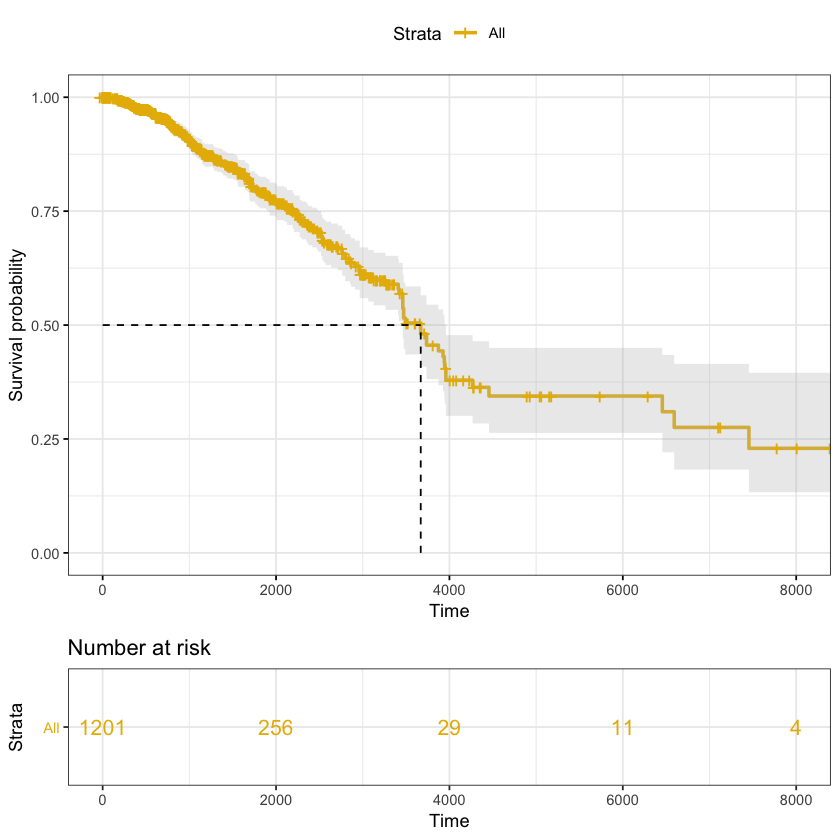

In [57]:
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(fit,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

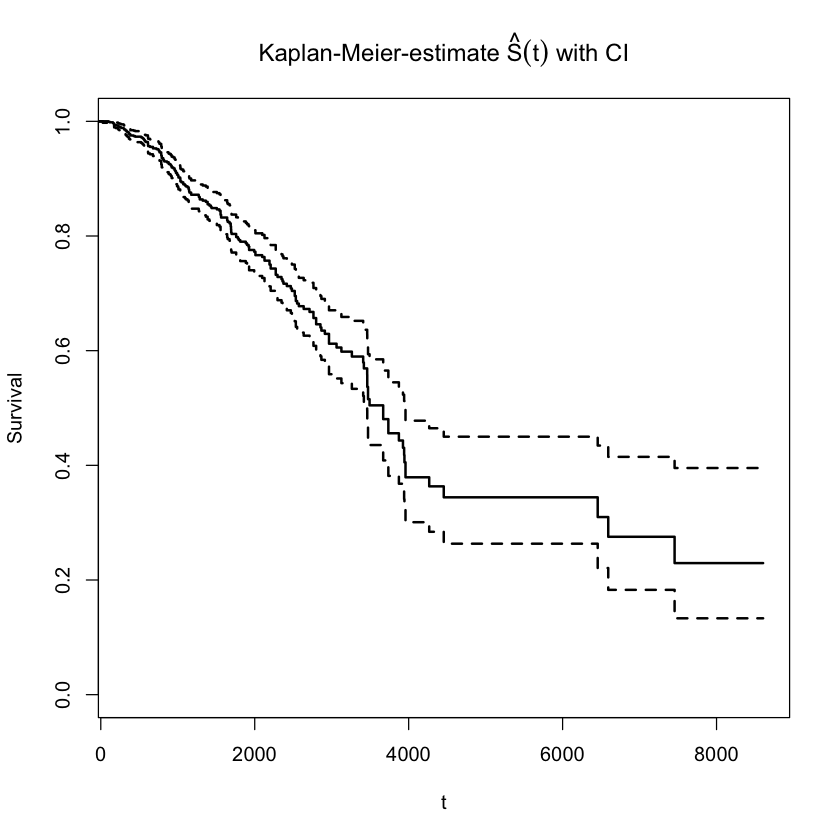

In [46]:
plot(fit, main=expression(paste("Kaplan-Meier-estimate ", hat(S)(t), " with CI")),
     xlab="t", ylab="Survival", lwd=2)

### Cox regression

In [62]:
res.cox <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + expressionPICK1 + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, data =  df)

In [63]:
summary(res.cox)

Call:
coxph(formula = Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + 
    expressionPICK1 + expressionWASF1 + expressionCYFIP1 + expressionABI1 + 
    expressionBRK1, data = df)

  n= 1203, number of events= 200 

                     coef exp(coef) se(coef)      z Pr(>|z|)
expressionNCKAP1  0.23083   1.25964  0.17815  1.296    0.195
expressionARPIN   0.03666   1.03734  0.09982  0.367    0.713
expressionPICK1  -0.17694   0.83783  0.11659 -1.518    0.129
expressionWASF1   0.07733   1.08039  0.06283  1.231    0.218
expressionCYFIP1  0.27677   1.31886  0.18697  1.480    0.139
expressionABI1   -0.05549   0.94602  0.17939 -0.309    0.757
expressionBRK1    0.15693   1.16992  0.15621  1.005    0.315

                 exp(coef) exp(-coef) lower .95 upper .95
expressionNCKAP1    1.2596     0.7939    0.8884     1.786
expressionARPIN     1.0373     0.9640    0.8530     1.261
expressionPICK1     0.8378     1.1936    0.6667     1.053
expressionWASF1     1.0804     0.9256    0.9552    

#### Test the assumptions of the cox regression

In [64]:
test.ph <- cox.zph(res.cox)
test.ph

                     rho   chisq      p
expressionNCKAP1  0.0389  0.2623 0.6085
expressionARPIN   0.0150  0.0481 0.8264
expressionPICK1  -0.1825  6.3397 0.0118
expressionWASF1  -0.0354  0.2657 0.6062
expressionCYFIP1 -0.0368  0.3421 0.5586
expressionABI1   -0.1169  2.7228 0.0989
expressionBRK1   -0.1134  2.4867 0.1148
GLOBAL                NA 12.8055 0.0770

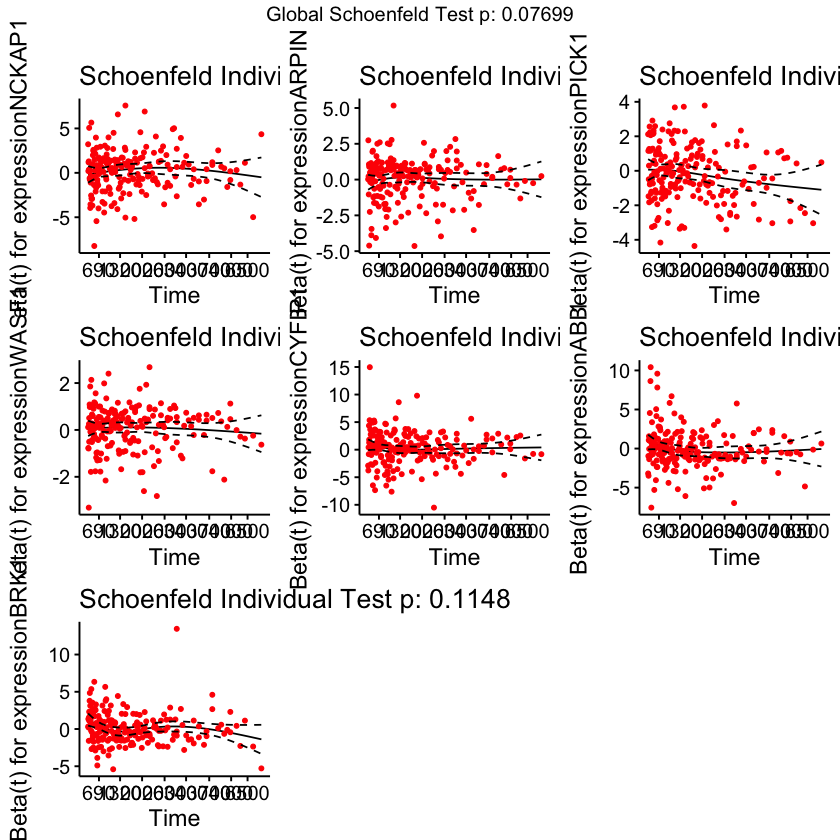

In [65]:
ggcoxzph(test.ph)

In [66]:
ggcoxdiagnostics(fit, type = , linear.predictions = TRUE)

ERROR: Error in ggcoxdiagnostics(fit, type = , linear.predictions = TRUE): Can't handle an object of class survfit
